<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-EM-type-procedure-to-maximize-J1" data-toc-modified-id="Using-EM-type-procedure-to-maximize-J1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using EM-type procedure to maximize J1</a></span><ul class="toc-item"><li><span><a href="#Gradient-of-J1($\theta$)---general-case" data-toc-modified-id="Gradient-of-J1($\theta$)---general-case-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gradient of J1($\theta$) - general case</a></span><ul class="toc-item"><li><span><a href="#Derivation-of-gradient" data-toc-modified-id="Derivation-of-gradient-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Derivation of gradient</a></span></li><li><span><a href="#FINAL-EXPRESSION-FOR-DERIVATIVE-OF-J1-W.R.T-THETA" data-toc-modified-id="FINAL-EXPRESSION-FOR-DERIVATIVE-OF-J1-W.R.T-THETA-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>FINAL EXPRESSION FOR DERIVATIVE OF J1 W.R.T THETA</a></span></li></ul></li><li><span><a href="#Gradient-of-J1($\theta$)-for-our-Mixture-of-Gaussian-model" data-toc-modified-id="Gradient-of-J1($\theta$)-for-our-Mixture-of-Gaussian-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient of J1($\theta$) for our Mixture of Gaussian model</a></span></li><li><span><a href="#Choice-of-q-distribution---the-posterior-p(z|x)" data-toc-modified-id="Choice-of-q-distribution---the-posterior-p(z|x)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Choice of q distribution - the posterior p(z|x)</a></span></li></ul></li><li><span><a href="#Comparison-of-true-NCE-objective-function-with-J1" data-toc-modified-id="Comparison-of-true-NCE-objective-function-with-J1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comparison of true NCE objective function with J1</a></span></li><li><span><a href="#EM-type-optimisation" data-toc-modified-id="EM-type-optimisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EM-type optimisation</a></span></li></ul></div>

# Using EM-type procedure to maximize J1

## Gradient of J1($\theta$) - general case

Optimising $\theta$ involves maximising the lower bound on the NCE objective:

\begin{align}
J_1^k(\theta) = \color{red}{- \mathbb{E}_{x} \mathbb{E}_{z \sim q_k} \left[ \log(1 + \frac{\nu}{r(x, z; \theta)}) \right]} - 
\color{blue}{ \nu \mathbb{E}_{y}  \left[ \log(1 + \frac{1}{\nu} \mathbb{E}_{z \sim q_k}[r(y, z; \theta)] ) \right]}
\end{align}

where 

$$ r(u,z, \theta) = \frac{\phi(u, z; \theta)}{q_k(z \ | \ u) p_y(u)}$$


Note that q here is *not* a function of theta.

### Derivation of gradient

To find the argmax of $J_1^K(\theta)$, we need to differentiate it. To do so, let us first further reduce the notational burden, by writing:

\begin{align}
J_1^k(\theta) & =  
              \color{red}{ - \mathbb{E}_{x} \mathbb{E}_{z \sim q_k} \left[ \log(\psi_1(x, z; \theta)) \right]} -        \color{blue}{ \nu \mathbb{E}_{y}  \left[  \log(\psi_2(y; \theta)) \right]} \\
\end{align}

Where the terms of the same colour are equivalent to each other.

Now, let us take derivative with respect to $\theta$:

\begin{align}
\color{red}{ \nabla_{\theta} \log(\psi_1(x, z; \theta))} 
           & = \frac{1}{\psi_1(x, z; \theta)} \nabla_{\theta} \psi_1(x, z; \theta) \\
           & = \frac{1}{\psi_1(x, z; \theta)} \frac{-\nu}{r(x, z; \theta)^2} \nabla_{\theta} r(x, z; \theta) \\
           & = \frac{1}{\psi_1(x, z; \theta)} \frac{-\nu}{r(x, z; \theta)^2} \frac{\nabla_{\theta} \phi(x, z; \theta)}{q_k(z \ | \ x)p_y(x)}
\end{align}

Hence, we need:

\begin{align}
\nabla_{\theta} \phi(x, z; \theta) & = \nabla_{\theta} \exp ( \log ( \phi(x, z; \theta) ) ) \\
          & = \left[ \nabla_{\theta} \log(\phi(x, z; \theta)) \right] \exp ( \log ( \phi(x, z; \theta) ) )\\
          & = \left[ \nabla_{\theta} \log(\phi(x, z; \theta)) \right] \phi(x, z; \theta) 
\end{align}

Plugging this back in, we get:

\begin{align}
\color{red}{ \nabla_{\theta} \log(\psi_1(x, z; \theta))} 
    & = \frac{1}{\psi_1(x, z; \theta)} 
        \frac{-\nu}{r(x, z; \theta)^2} 
        \frac{\left[ \nabla_{\theta} \log(\phi(x, z; \theta)) \right] \phi(x, z; \theta)}{q_k(z \ | \ x)p_y(x)} \\
    & = \frac{1}{\psi_1(x, z; \theta)} 
        \frac{-\nu}{r(x, z; \theta)} 
        \left[ \nabla_{\theta} \log(\phi(x, z; \theta)) \right] \\
    & = \color{red}{- \frac{\psi_1(x, z; \theta) - 1}{\psi_1(x, z; \theta)} 
        \left[ \nabla_{\theta} \log(\phi(x, z; \theta)) \right]} \\
\end{align}

Where in the final line we used the fact that $\color{red}{\psi_1(x, z; \theta) - 1 = \frac{\nu}{r(x, z; \theta)}}$.

Now we find the derivative of the second (blue) term of $J_1^K(\theta)$. Recalling that $\color{blue}{\psi_2(y; \theta) = 1 + \frac{1}{\nu} \mathbb{E}_{z \sim q_k}[r(y, z; \theta)]}$, we have:

\begin{align}
\color{blue}{\nabla_{\theta} \log(\psi_2(y; \theta))}
    & = \frac{1}{\psi_2(y; \theta)} \nabla_{\theta} \psi_2(y; \theta) \\
    & = \frac{1}{\psi_2(y; \theta)} 
        \frac{1}{\nu} \mathbb{E}_{z \sim q_k} 
        \left[ \frac{\nabla_{\theta} \phi(y, z; \theta)}{q_k(z \ | \ y)p_y(y)} \right] \\  
    & = \color{blue}{\frac{1}{\nu} 
        \frac{1}{\psi_2(y; \theta)} 
        \mathbb{E}_{z \sim q_k} \left[ r(y, z; \theta) \left[ \nabla_{\theta} \log(\phi(y, z; \theta)) \right] \right]} \\
\end{align}

### FINAL EXPRESSION FOR DERIVATIVE OF J1 W.R.T THETA

Putting this all together, we arrive at: 

\begin{align}
\nabla_{\theta}(J_1^k(\theta)) & =  
    \color{red}{ \mathbb{E}_{x} \mathbb{E}_{z \sim q_k} \frac{\psi_1(x, z; \theta) - 1}{\psi_1(x, z; \theta)} 
                \left[ \nabla_{\theta} \log(\phi(x, z; \theta)) \right]} 
    \color{blue}{ - \mathbb{E}_y
                 \frac{1}{\psi_2(y; \theta)} 
                \mathbb{E}_{z \sim q_k} \left[ r(y, z; \theta) \left[ \nabla_{\theta} \log(\phi(y, z; \theta)) \right] \right]} \\
\end{align}

Where (to remind oursevles yet again): 
\begin{align}
\color{red}{\psi_1(x, z; \theta) = 1 + \frac{\nu}{r(x, z; \theta)}} \\
\color{blue}{\psi_2(y; \theta) = 1 + \frac{1}{\nu} \mathbb{E}_{z \sim q_k}[r(y, z; \theta)]}
\end{align}

## Gradient of J1($\theta$) for our Mixture of Gaussian model

We simply need to plug in the gradient of the log model into the above equation. This is given by:
\begin{align}
\color{red}{\nabla_{\theta} \log(\phi(x, z; \theta))}
    & = \nabla_{\theta} \log \left( \frac{1}{2} (1 - z) \mathcal{N}_{\theta} + \frac{1}{2} z \mathcal{N}_{\sigma_1} \right) \\
    & = \frac{\frac{1}{2} (1 - z) \nabla_{\theta}\mathcal{N}_{\theta}}{ \frac{1}{2} (1 - z) \mathcal{N}_{\theta} + \frac{1}{2} z \mathcal{N}_{\sigma_1}} \\
    & = \frac{(1 - z) \mathcal{N}_{\theta}}{(1 - z) \mathcal{N}_{\theta} + z \mathcal{N}_{\sigma_1}} 
        \left[ \frac{x^2}{\theta^3} - \frac{1}{\theta} \right] \\
    & = \color{red}{(1 - z)  \left[ \frac{x^2}{\theta^3} - \frac{1}{\theta} \right] }
\end{align}

Similarly,

\begin{align}
\color{blue}{\nabla_{\theta} \log(\phi(y, z; \theta))}
    & = \color{blue}{(1 - z)
        \left[ \frac{y^2}{\theta^3} - \frac{1}{\theta} \right] }
\end{align}

## Choice of q distribution - the posterior p(z|x)

For a simple initial experiment, we will iterate between optimising $\theta$ (for a fixed q) to obtain $\theta_k$, and then resetting q to be:

$$ q_k := p(z=0 \ | \ u; \theta_k) = \left(  1 + \frac{\theta_k}{\sigma_1} \exp \left(\frac{- u^2}{2} \left( \frac{1}{\sigma_1^2} - \frac{1}{\theta_k^2} \right) \right) \right)^{-1} $$

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np

# my code
from distribution import MixtureOfTwoGaussianBernoulliPosterior, GaussianNoise
from fully_observed_models import MixtureOfTwoGaussians
from latent_variable_model import LatentMixtureOfTwoGaussians
from nce_optimiser import NCEOptimiser
from utils import evaluate_loss_at_param
from vnce_optimiser import VemOptimiser, ScipyMinimiseEmStep, ExactEStep, MonteCarloVnceLoss

from matplotlib import pyplot as plt
from matplotlib import rc
from numpy import random as rnd
from scipy.optimize import minimize
from scipy.stats import norm, multivariate_normal
from sklearn.neighbors import KernelDensity as kd

%matplotlib inline
rc('lines', linewidth=3)
rc('font', size=18)
rc('legend', fontsize=16)
rc('text', usetex=True)

In [3]:
# For reproducibility
rng = rnd.RandomState(1083463236)

In [38]:
# overwrite existing figures saved on disk
new_figs = False

In [5]:
# mixing proportions: 0.5 and 0.5
# mean0 = mean1 = 0
sigma1 = 1
sigma0 = 4  # (parameter of interest)

n = 10000 # number of data points
nz = 1  # number of latent samples per datapoint
nu = 1  # nu is the ratio of noise to data samples in NCE

# use theta = exp(param) as parameter in model, to enforce positivity
true_theta = np.array([np.log(sigma0)])
theta0 = np.array([np.log(0.8)])  # initial value of theta is log(0.8) = -0.2 (approx)
alpha0 = theta0

In [6]:
true_data_dist = LatentMixtureOfTwoGaussians(theta=np.log(sigma0), sigma1=sigma1)
X = true_data_dist.sample(n) # generate data

In [7]:
noise = GaussianNoise(mean=0, cov=sigma0**2)
Y = noise.sample(n * nu)

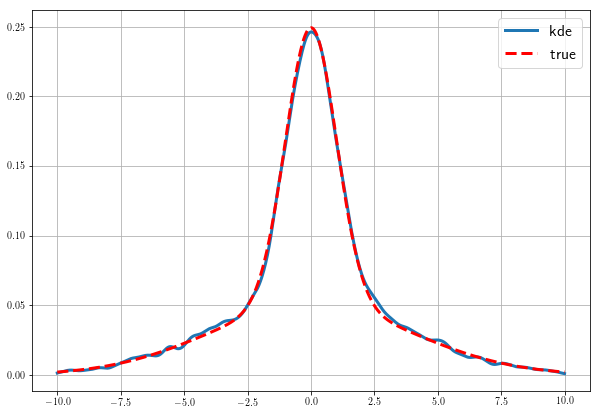

In [8]:
true_data_dist.plot_sample_density_against_true_density(X)

In [9]:
model = LatentMixtureOfTwoGaussians(theta0, sigma1=sigma1)
nce_model = MixtureOfTwoGaussians(theta0, sigma1=sigma1)
var_dist = MixtureOfTwoGaussianBernoulliPosterior(alpha=alpha0, sigma1=sigma1)

In [10]:
loss_function = MonteCarloVnceLoss(model=model,
                                   data=X,
                                   noise=noise,
                                   noise_samples=Y,
                                   variational_noise=var_dist,
                                   noise_to_data_ratio=nu,
                                   num_latent_per_data=nz)
m_step = ScipyMinimiseEmStep(do_m_step=True, optimisation_method='BFGS')
e_step = ExactEStep()
optimiser = VemOptimiser(m_step=m_step, e_step=e_step)

In [11]:
nce_optimiser = NCEOptimiser(model=nce_model, noise=noise, noise_samples=Y, nu=nu)

# Comparison of true NCE objective function with J1

In [12]:
thetas = np.arange(0.5, 8, 0.1)
n_theta = len(thetas)

In [13]:
J = np.zeros(n_theta)
for k, theta_k in enumerate(thetas):
    log_theta_k = np.log(theta_k)
    J[k] = nce_optimiser.evaluate_J_at_param(theta=log_theta_k, X=X)

In [14]:
# Let's compute values of objective for fixed variation q, with alpha=sigma0
var_dist.alpha = np.array([sigma0])
J1_sigma0 = np.zeros(n_theta)  

for k, theta_k in enumerate(thetas):
    log_theta_k = np.log(theta_k)
    J1_sigma0[k] = evaluate_loss_at_param(loss_function=loss_function, theta=log_theta_k)

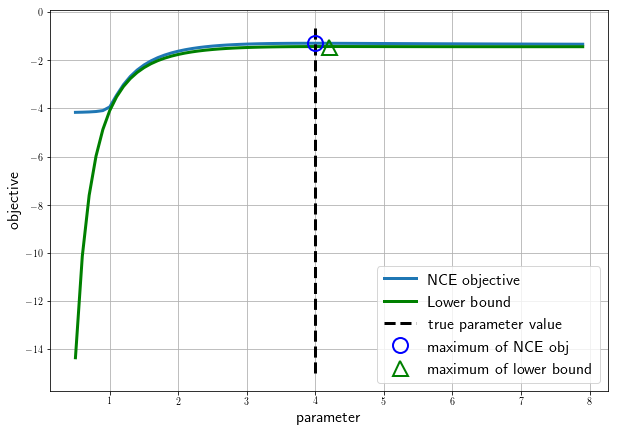

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.plot(thetas, J, label='NCE objective')
plt.plot(thetas, J1_sigma0, 'g', label='Lower bound')

# true param value
plt.plot(sigma0 * np.array([1,1]), plt.get(fig.gca(),'ylim'), 'k--', label='true parameter value')

# maximiser of NCE obj
index = np.argmax(J)
plt.plot(thetas[index],J[index], marker='o', markersize=15, fillstyle='none', 
         markeredgewidth=2, c='b', linestyle='none', label='maximum of NCE obj')

# maximiser of lower bound
index2 = np.argmax(J1_sigma0)
plt.plot(thetas[index2], J1_sigma0[index2], '^', markersize=15, fillstyle='none', 
         markeredgewidth=2, c='g', linestyle='none', label='maximum of lower bound')

plt.xlabel('parameter', fontsize=16)
plt.ylabel('objective', fontsize=16)
plt.legend(loc='lower right', numpoints=1)
plt.grid()

In [16]:
np.sum(J1_sigma0 < J) / J.size

1.0

# EM-type optimisation

In [17]:
optimiser.fit(loss_function=loss_function, theta0=theta0, alpha0=alpha0, stop_threshold=1e-4)

Optimization terminated successfully.
         Current function value: 4.103082
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 1.602660
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 1.292612
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 1.292326
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4


Text(0,0.5,'Value of objective function $J_1(\\theta)$')

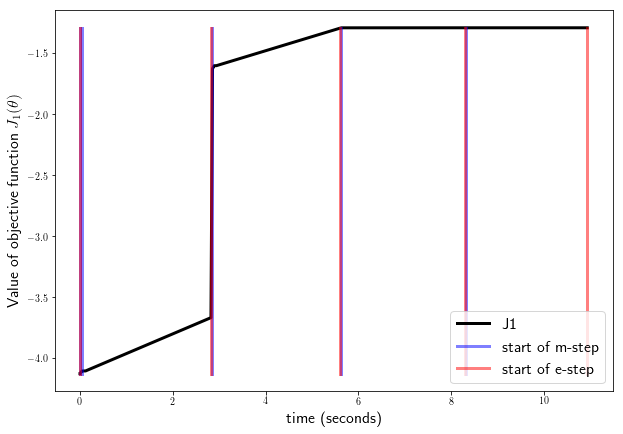

In [40]:
fig = optimiser.plot_loss_curve()
ax = fig.gca()
ax.plot()
ax.set_ylabel(r'Value of objective function $J_1(\theta)$', fontsize=16)

if new_figs:
    fig.savefig('../../figs/em-loss-curve-mog.pdf')

In [20]:
optimiser_thetas, optimiser_alphas, losses, times = optimiser.get_flattened_result_arrays()
_, _, m_start_ids, e_start_ids = optimiser.get_m_and_e_step_ids()
num_e_and_m_steps = len(e_start_ids + m_start_ids)
num_e_steps = len(e_start_ids)

In [21]:
thetas = np.arange(0.5, 8, 0.1)
n_theta = len(thetas)

In [22]:
# plot J1 as a function of theta for each variational lower bound
lower_bounds = [np.zeros(n_theta) for i in range(num_e_steps)]
for i in range(len(lower_bounds)):
    
    # update alpha to the value at end of ith E step
    alpha_i = optimiser.alphas[i][-1]
    loss_function.set_alpha(alpha_i)
    
    for j in range(n_theta):
        log_theta_k = np.log(thetas[j])
        lower_bounds[i][j] = evaluate_loss_at_param(loss_function=loss_function, theta=log_theta_k)

In [26]:
def plot_nce_objective(ax):
    ax.plot(thetas, J, label=r'NCE objective $J(\theta)$')
    ax.plot(thetas[index],J[index], marker='o', markersize=15, fillstyle='none', 
         markeredgewidth=2, c='b', linestyle='none', label=r'maximum of $J(\theta)$')

def plot_lower_bound(ax, lb):
    lb_argmax = np.argmax(lb)
    ax.plot(thetas, lb, label=r'lower bound $J_1(\theta)$', c='r')
    ax.plot(thetas[lb_argmax], lb[lb_argmax], 'rs', markersize=15, fillstyle='none', 
             markeredgewidth=2, linestyle='none', label=r'maximum of $J_1(\theta)$')

def plot_ground_truth(ax):
    ax.plot(sigma0 * np.array([1,1]), plt.get(ax,'ylim'), 'k--', label='true parameter value')
    
# def label_graph(ax):
#     #ax.set_xlabel(r'${\theta}$', fontsize=18)
#     #ax.set_ylabel('Objective', fontsize=18)
#     ax.legend(loc='lower right', numpoints=1, fontsize=16)

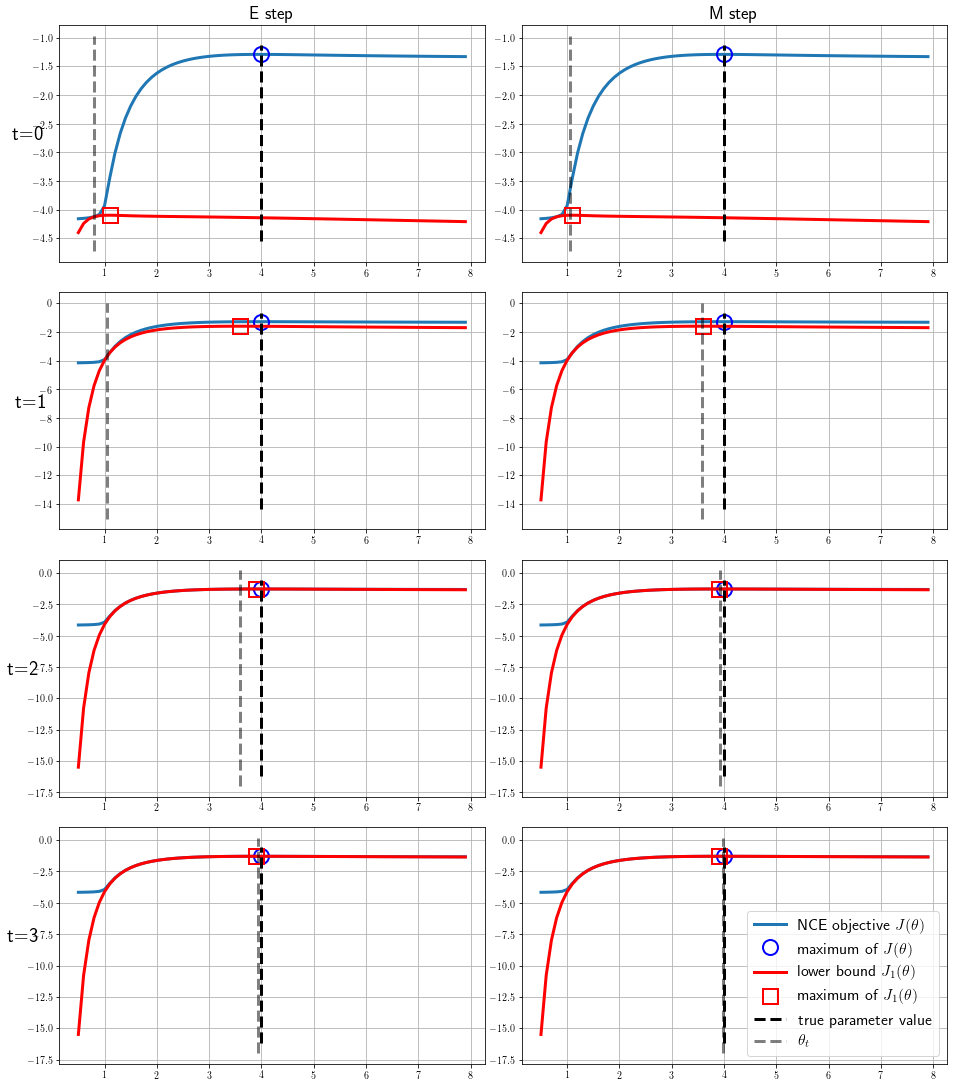

In [42]:
fig, axes = plt.subplots(num_e_steps-1, 2, figsize=(13, 15))
axs = axes.ravel()
fig.tight_layout()

ax_id = -1
for i in range(num_e_steps-1):
    # current parameters
    theta_i = np.exp(optimiser.thetas[i][-1])
    theta_i_plus_one = np.exp(optimiser.thetas[i+1][-1])
    alpha_i = np.exp(optimiser.alphas[i][-1])
    lower_Bound_i = lower_bounds[i]
    
    # E-step
    ax_id += 1
    axs[ax_id].grid()
    plot_nce_objective(axs[ax_id])
    plot_lower_bound(axs[ax_id], lower_Bound_i)
    plot_ground_truth(axs[ax_id])
    axs[ax_id].plot(theta_i * np.array([1,1]), 
                    plt.get(axs[ax_id],'ylim'), 'k--', alpha=0.5, label=r'$\theta_t$')
    #label_graph(axs[ax_id])
    
    # M-step
    ax_id += 1
    axs[ax_id].grid()
    plot_nce_objective(axs[ax_id])
    plot_lower_bound(axs[ax_id], lower_Bound_i)
    plot_ground_truth(axs[ax_id])
    axs[ax_id].plot(theta_i_plus_one * np.array([1,1]), 
                    plt.get(axs[ax_id],'ylim'), 'k--', alpha=0.5, label=r'$\theta_t$')
    
axs[ax_id].legend(loc='lower right', numpoints=1, fontsize=16)
cols = ['E step', 'M step']
rows = ['t={}'.format(row) for row in range(num_e_steps-1)]

for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize=18, weight='bold')
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, fontsize=20, weight='bold')
    
if new_figs:
    fig.savefig('../../figs/lower-bounds-normalised-em-mog.pdf')